In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

2023-01-13 14:35:04.056562: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()

In [3]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_test.shape

(10000, 1)

In [9]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [11]:
# verileri daha rahat anlamak için tek boyutlu hale getiriyoruz
y_test = y_test.reshape(-1)

In [12]:
resim_siniflari = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [13]:
def plot_sample(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(resim_siniflari[y[index]])
    plt.show()


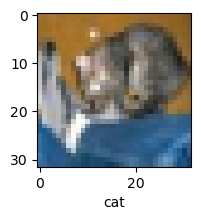

In [14]:
plot_sample(x_test, y_test, 0)

In [15]:
# Normalization yapmak için  RGB olarak 3 kanal ve her bir pixel 0-255 arasında değer aldığı için 
# basitçe her bir pixel değerini 255'e bölmemiz yeterli
x_train = x_train / 255
x_test = x_test / 255

In [20]:
deep_learning_model = models.Sequential([
    
    # Convolution layer kısmında fotoğraflardan tanımlama yapabilmek için özellikleri çıkarıyoruz
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
    # belirli bölgedeki en yüksek değeri alıp ve girdi verilerini ve işlem süresini azaltmak için pooling yapıyoruz
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
     # Yukarıdaki özelliklerimiz ve training bilgilerine göre ANN modelimizi eğitiyoruz
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [21]:
deep_learning_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
deep_learning_model.fit(x_train, y_train, epochs =5)

Epoch 1/5
1563/1563 [==============================] - 28s 17ms/step - loss: 1.4946 - accuracy: 0.4638
Epoch 2/5
1563/1563 [==============================] - 26s 17ms/step - loss: 1.1444 - accuracy: 0.5976
Epoch 3/5
1563/1563 [==============================] - 26s 17ms/step - loss: 1.0089 - accuracy: 0.6506
Epoch 4/5
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9195 - accuracy: 0.6816
Epoch 5/5
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8548 - accuracy: 0.7030


In [38]:
deep_learning_model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.9351 - accuracy: 0.6762


[0.9351480603218079, 0.6761999726295471]

In [39]:
y_pred = deep_learning_model.predict(x_test)
y_pred[:3]

313/313 [==============================] - 2s 6ms/step


array([[8.9732064e-03, 1.5230711e-04, 1.4517739e-02, 6.3901210e-01,
        4.2107119e-03, 2.2743782e-01, 3.8764097e-02, 1.2850014e-03,
        6.4406633e-02, 1.2404305e-03],
       [1.5266995e-03, 1.8755404e-03, 9.9854969e-06, 2.7839110e-06,
        3.6764552e-06, 1.7967689e-07, 5.3010149e-07, 2.3351506e-06,
        9.9617141e-01, 4.0682158e-04],
       [8.5248426e-02, 1.3710800e-01, 3.1216065e-03, 7.0345588e-03,
        2.0207274e-03, 5.0956034e-04, 1.0267724e-03, 1.0378705e-03,
        6.7953628e-01, 8.3356142e-02]], dtype=float32)

In [40]:
y_prediction_siniflari = [np.argmax(element) for element in y_pred]
y_prediction_siniflari[:3]

[3, 8, 8]

In [41]:
y_test[:3]

array([3, 8, 8], dtype=uint8)

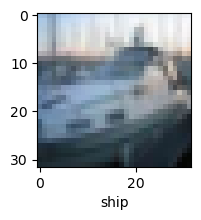

In [42]:
plot_sample(x_test, y_test, 2)

In [45]:
resim_siniflari[y_prediction_siniflari[0]]

'cat'